# Manipulating Images

In [1]:
# Download the images for the lab
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/cat.png -O cat.png
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/lenna.png -O lenna.png
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/baboon.png -O baboon.png

--2022-08-11 13:07:22--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/cat.png
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 663451 (648K) [image/png]
Saving to: ‘cat.png’

cat.png             100%[===================>] 647.90K   351KB/s    in 1.8s    

2022-08-11 13:07:29 (351 KB/s) - ‘cat.png’ saved [663451/663451]

--2022-08-11 13:07:30--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/lenna.png
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.

In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

### Copying Images

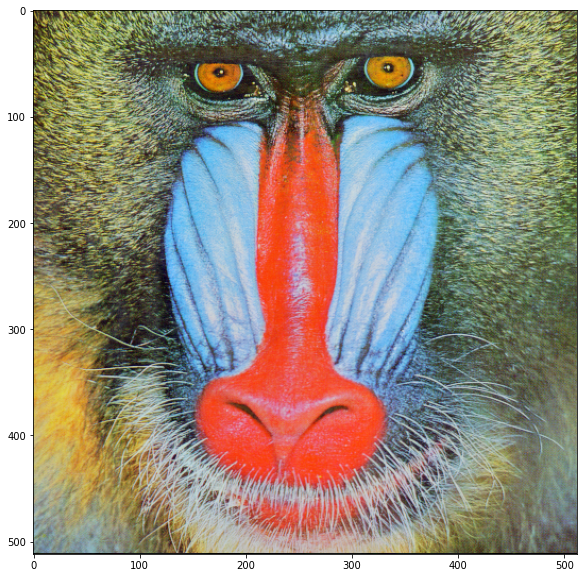

In [3]:
baboon = cv2.imread("baboon.png")
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(baboon, cv2.COLOR_BGR2RGB))
plt.show()

In [4]:
A = baboon

In [5]:
id(A) == id(baboon)
id(A)

140208031918448

In [6]:
B = baboon.copy()
id(B) == id(baboon)

False

In [7]:
baboon[:,:,] = 0

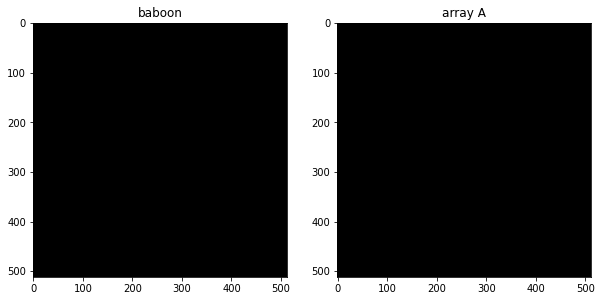

In [8]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(cv2.cvtColor(baboon, cv2.COLOR_BGR2RGB))
plt.title("baboon")
plt.subplot(122)
plt.imshow(cv2.cvtColor(A, cv2.COLOR_BGR2RGB))
plt.title("array A")
plt.show()

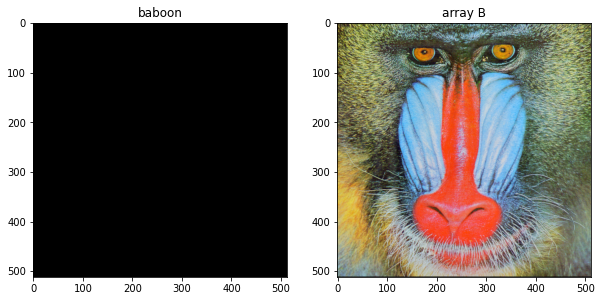

In [9]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(cv2.cvtColor(baboon, cv2.COLOR_BGR2RGB))
plt.title("baboon")
plt.subplot(122)
plt.imshow(cv2.cvtColor(B, cv2.COLOR_BGR2RGB))
plt.title("array B")
plt.show()

### Fliping Images

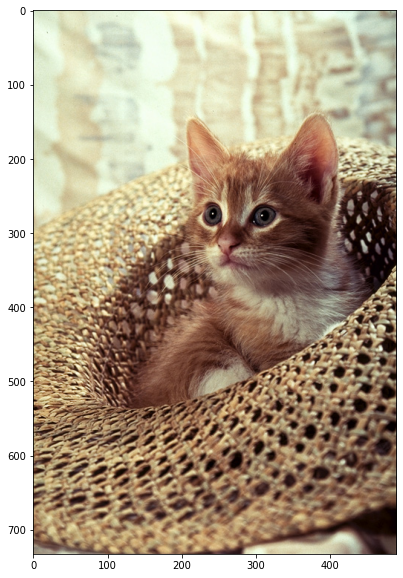

In [10]:
image = cv2.imread("cat.png")
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [11]:
width, height, C = image.shape
print('width, height, C', width, height, C)

width, height, C 733 490 3


In [12]:
array_flip = np.zeros((width, height, C), dtype=np.uint8)

In [13]:
for i, row in enumerate(image):
    array_flip[width-1-i,:,:] = row

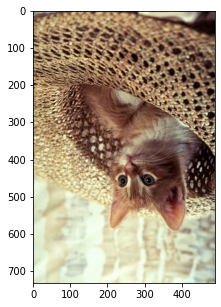

In [14]:
plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(array_flip, cv2.COLOR_BGR2RGB))
plt.show()

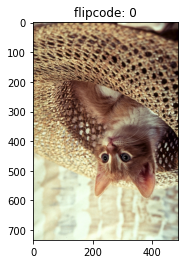

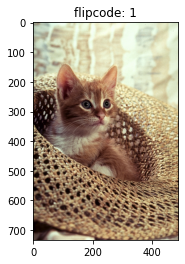

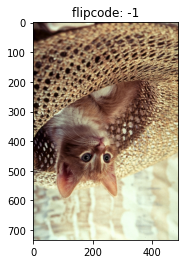

In [15]:
for flipcode in [0,1,-1]:
    im_flip = cv2.flip(image, flipcode )
    plt.imshow(cv2.cvtColor(im_flip,cv2.COLOR_BGR2RGB))
    plt.title("flipcode: "+str(flipcode))
    plt.show()

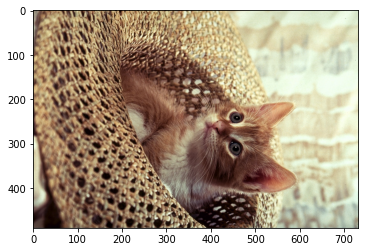

In [16]:
im_flip = cv2.rotate(image,0)
plt.imshow(cv2.cvtColor(im_flip,cv2.COLOR_BGR2RGB))
plt.show()

In [17]:
flip = {"ROTATE_90_CLOCKWISE":cv2.ROTATE_90_CLOCKWISE, "ROTATE_90_COUNTERCLOCKWISE":cv2.ROTATE_90_COUNTERCLOCKWISE, "ROTATE_180":cv2.ROTATE_180}

In [18]:
flip["ROTATE_90_CLOCKWISE"]

0

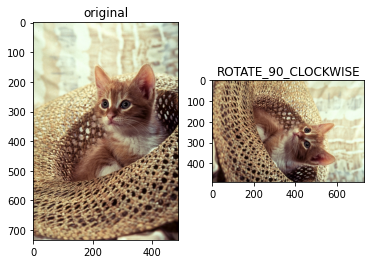

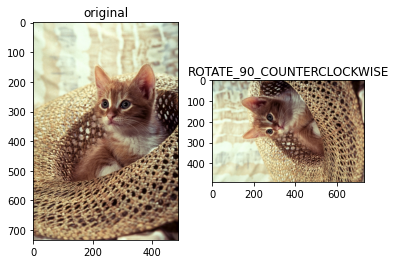

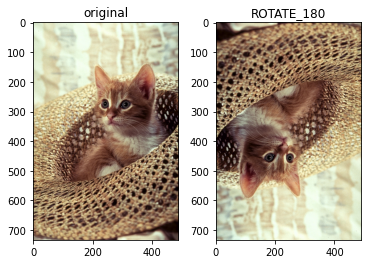

In [19]:
for key, value in flip.items():
    plt.subplot(1,2,1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("original")
    plt.subplot(1,2,2)
    plt.imshow(cv2.cvtColor(cv2.rotate(image,value), cv2.COLOR_BGR2RGB))
    plt.title(key)
    plt.show()

### Cropping an Image

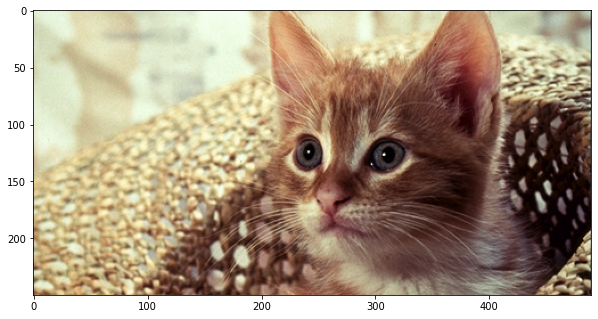

In [20]:
upper = 150
lower = 400
crop_top = image[upper: lower, :,:]
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(crop_top, cv2.COLOR_BGR2RGB))
plt.show()

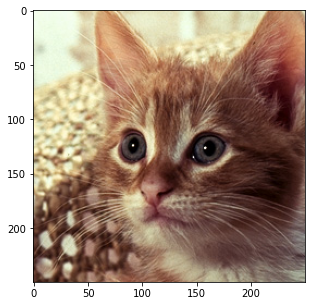

In [21]:
left = 150
right = 400
crop_horizontal = crop_top[: ,left:right, :]
plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(crop_horizontal, cv2.COLOR_BGR2RGB))
plt.show()

### Changing Specific Image Pixels

In [22]:
array_sq = np.copy(image)
array_sq[upper:lower,left:right,:] = 0

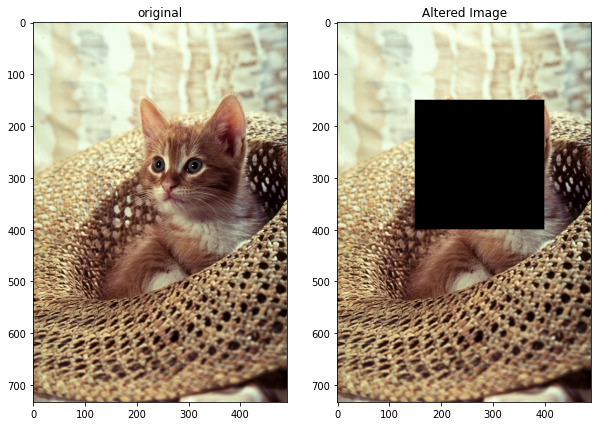

In [23]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("original")
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(array_sq,cv2.COLOR_BGR2RGB))
plt.title("Altered Image")
plt.show()

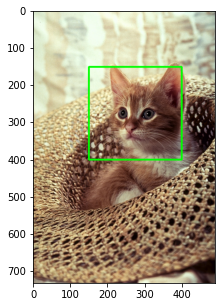

In [24]:
start_point, end_point = (left, upper),(right, lower)
image_draw = np.copy(image)
cv2.rectangle(image_draw, pt1=start_point, pt2=end_point, color=(0, 255, 0), thickness=3)
plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(image_draw, cv2.COLOR_BGR2RGB))
plt.show()

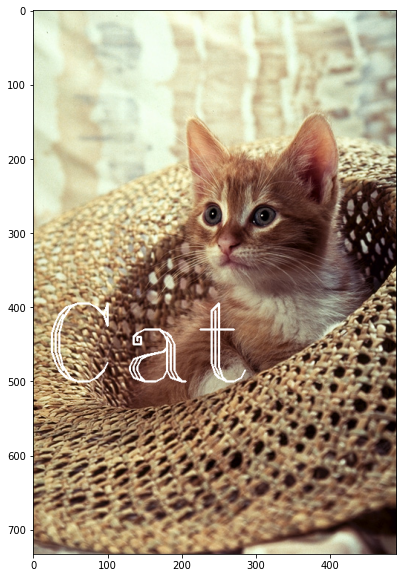

In [25]:
image_draw=cv2.putText(img=image, text='Cat',org=(10,500), color=(255,255,255),fontFace=4,fontScale=5,thickness=2)
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(image_draw, cv2.COLOR_BGR2RGB))
plt.show()

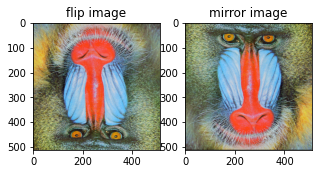

In [27]:
im = cv2.imread('baboon.png')
im_flip = cv2.flip(im,0)
im_mirror = cv2.flip(im,1)
plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(im_flip, cv2.COLOR_BGR2RGB))
plt.title("flip image")
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(im_mirror, cv2.COLOR_BGR2RGB))
plt.title("mirror image")
plt.show()